# 06.1 Modelling Principles for Interest Rate Models
<h3><span style="color:#800000;"><strong>Authored by:</strong> <em>Alexandre Mathias DONNAT, Sr</em></span></h3>

**Goal of this notebook** :

We introduce the short rate point of view and the link:

$$r_t \implies P(t,T) \implies \text{bond options and forward measures}$$

More precisely, we:

- define the deterministic yield curve and zero-coupon prices,
- move to the stochastic short rate world and the risk-neutral pricing formula,
- interpret the market price of risk and bond risk premia,
- introduce forward measures and the change of numéraire,
- recover Black's formula for bond options under a $\theta$-forward measure,
- illustrate numerically with a toy yield curve and bond option under Black.

**This notebook** :

Is the conceptual bridge between static yield curves (term-structure at a given date) and the dynamic models of Chapter 6.2 (Vasicek, CIR, HJM, BGM).


# 1. Deterministic yield curve: rates, zero-coupons, and yields

We start in a deterministic world to fix notation.

For a loan of 1 unit issued at time $t$ and repaid at $T$:

$$F(t,T) = e^{(T-t)R(t,T)},$$

where $R(t,T)$ is the average (continuously compounded) rate between $t$ and $T$.

No-arbitrage implies the multiplicative property:

$$F(t,s) = F(t,u) \, F(u,s) \quad \Rightarrow \quad F(t,T) = \exp\left(\int_t^T r(s) \, ds\right),$$

for some instantaneous rate $r(s)$. Hence

$$R(t,T) = \frac{1}{T-t} \int_t^T r(s) \, ds.$$

The zero-coupon bond price is

$$P(t,T) = e^{-\int_t^T r(s) \, ds}, \quad P(T,T) = 1,$$

and the spot yield is

$$Y(t,T) = -\frac{1}{T-t} \ln P(t,T) = R(t,T).$$


# 1.1 Toy deterministic curve and bond prices

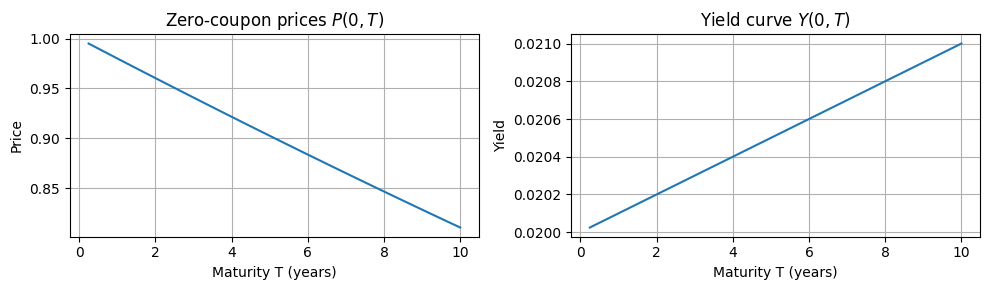

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Simple deterministic instantaneous rate r(s): slightly upward sloping term structure
def r_det(s):
    # base 2% + small slope 0.2% per year
    return 0.02 + 0.0002 * s

def integral_r(t, T, n_steps=1000):
    grid = np.linspace(t, T, n_steps)
    rs = r_det(grid)
    return np.trapz(rs, grid)

def P_det(t, T):
    return np.exp(-integral_r(t, T))

# Times to maturity from 0.25 to 10 years
Ts = np.linspace(0.25, 10.0, 40)
P0T = np.array([P_det(0.0, T) for T in Ts])
Y0T = -np.log(P0T) / Ts

fig, ax = plt.subplots(1, 2, figsize=(10, 3))

ax[0].plot(Ts, P0T)
ax[0].set_title("Zero-coupon prices $P(0,T)$")
ax[0].set_xlabel("Maturity T (years)")
ax[0].set_ylabel("Price")
ax[0].grid(True)

ax[1].plot(Ts, Y0T)
ax[1].set_title("Yield curve $Y(0,T)$")
ax[1].set_xlabel("Maturity T (years)")
ax[1].set_ylabel("Yield")
ax[1].grid(True)

plt.tight_layout()
plt.show()


The zero-coupon curve decreases smoothly with maturity, as expected since longer horizons imply heavier discounting. The associated yield curve increases slightly with 𝑇, reflecting higher implied yields for longer maturities.

# 2. Stochastic short rate and risk-neutral pricing

In an uncertain world, the short rate becomes a stochastic process $(r_t)_{t \geq 0}$, adapted to $(\mathcal{F}_t)$.

The risk-free account is

$$S_t^0 = \exp\left(\int_0^t r(s) \, ds\right).$$

Under an equivalent risk-neutral measure $\mathbb{P}^*$, the discounted prices of all tradable assets are martingales. For a zero-coupon bond maturing at $T$:

$$P(t,T) = \mathbb{E}^*\left[e^{-\int_t^T r(s) \, ds} \mid \mathcal{F}_t\right].$$

This is the fundamental bond pricing formula: the bond price is the conditional expectation of the discounted payoff $1$.


# 3. Dynamics of bonds, market price of risk, and risk premium

Let $(W_t)$ be a Brownian motion under the physical measure $\mathbb{P}$.
We introduce a market price of risk process $q(t)$ and the density

$$L_t = \exp\left(\int_0^t q(s) \, dW_s - \frac{1}{2}\int_0^t q(s)^2 \, ds\right), \quad \mathbb{E}[L_T] = 1.$$

Under the new measure $\mathbb{P}^*$ (defined by $L_T$), the process

$$\tilde{W}_t = W_t - \int_0^t q(s) \, ds$$

is a Brownian motion. This is Girsanov's theorem in this context.

The price of a zero-coupon under $\mathbb{P}$ can be written as

$$\frac{dP(t,T)}{P(t,T)} = (r(t) - \sigma_{t}^T q(t)) \, dt + \sigma_{t}^T \, dW_t,$$

where $\sigma_{t}^T$ is the volatility of the bond. Under $\mathbb{P}^*$,

$$\frac{dP(t,T)}{P(t,T)} = r(t) \, dt + \sigma_{t}^T \, d\tilde{W}_t.$$

**Under $\mathbb{P}$:** drift = $r(t) - \sigma_{t}^T q(t)$ → risk-free rate minus risk premium.

**Under $\mathbb{P}^*$:** drift = $r(t)$ → all risk premia are absorbed in the change of measure.

The term $-\sigma_{t}^T q(t)$ is the bond risk premium.


# 4. Bond options: pricing under the risk-neutral measure

Consider a European call option on a T-maturity zero-coupon, expiring at $\theta < T$, with payoff

$$h = (P(\theta, T) - K)^+.$$

Under the risk-neutral measure $\mathbb{P}^*$,

$$V_t = \mathbb{E}^*\left[e^{-\int_t^\theta r(s)\,ds} h \mid \mathcal{F}_t\right].$$

If $\sigma_t^T \neq 0$ for $t \in [0, \theta]$, the market is complete on this horizon and the call can be perfectly replicated using bonds and the money-market account.


# 5. Forward measures and change of numéraire

To simplify some pricing formulas, it is convenient to change the numéraire.

Let us fix a maturity $T$. The $T$-forward measure $\mathbb{P}_T$ is defined by

$$\frac{d\mathbb{P}_T}{d\mathbb{P}^*} = \frac{e^{-\int_0^T r(s)\,ds}}{P(0,T)}.$$

Under $\mathbb{P}_T$,

- the $T$-maturity bond $P(t,T)$ is the numéraire,
- any ratio $P(t,U)/P(t,T)$ (a forward price) is a martingale.

In particular, for a payoff $h$ at time $\theta \leq T$,

$$\mathbb{E}^*\left[e^{-\int_t^\theta r(s)\,ds} h \mid \mathcal{F}_t\right] = P(t,\theta)\, \mathbb{E}_\theta[h \mid \mathcal{F}_t],$$

where $\mathbb{E}_\theta$ denotes the expectation under the $\theta$-forward measure $\mathbb{P}_\theta$.

This is the basic change-of-numéraire identity: under the $\theta$-forward measure, prices expressed in units of the $\theta$-bond evolve as martingales.


# 6. Bond options under the θ–forward measure (Black's formula)

Consider again the call on a T-bond, expiring at $\theta$ with payoff

$$h = (P(\theta, T) - K)^+.$$

Define the forward price of the T-bond for delivery at θ:

$$P_\theta(t, T) = \frac{P(t, T)}{P(t, \theta)}.$$

Under the $\theta$-forward measure $\mathbb{P}_\theta$,

$$\mathbb{E}^*\left[e^{-\int_t^\theta r(s)\,ds} h \mid \mathcal{F}_t\right] = P(t, \theta)\, \mathbb{E}_\theta\left[(P(\theta, T) - K)^+ \mid \mathcal{F}_t\right] = P(t, \theta)\, \mathbb{E}_\theta\left[(P_\theta(\theta, T) - K)^+ \mid \mathcal{F}_t\right].$$

If the bond volatilities $\sigma_t^T, \sigma_t^\theta$ are deterministic, then the forward price $P_\theta(\theta, T)$ is log-normal under $\mathbb{P}_\theta$. We get a Black-type formula:

$$C_t = P(t, \theta)\left(P_\theta(t, T) N(d_1) - K N(d_2)\right),$$

with

$$d_{1,2} = \frac{\ln(P_\theta(t, T)/K) \pm \frac{1}{2}\Sigma^2(t, \theta)}{\Sigma(t, \theta)}, \quad \Sigma^2(t, \theta) = \int_t^\theta (\sigma_s^T - \sigma_s^\theta)^2\,ds.$$

This is the Black formula for interest rate options (e.g. caps, floors, swaptions in simple settings).


## 6.1 Simple numerical illustration of Black's bond option pricec

For a toy example, we assume:

- flat short rate $r$,e $r$,
- constant forward volatility $\Sigma$,constant forward volatility $\Sigma$,
- discount bond $P(t,\theta)$ given by $e^{-r(\theta-t)}$,discount bond $P(t,\theta)$ given by $e^{-r(\theta-t)}$,
- forward price $P_\theta(t,T)$ given exogenously.- forward price $P_\theta(t,T)$ given exogenously.


In [2]:
import numpy as np
from scipy.stats import norm

def black_bond_call_price(P_t_theta, F_t, K, sigma, tau):
    """
    Black call on a bond under the θ-forward measure.

    Parameters
    ----------
    P_t_theta : float
        P(t, θ) discount factor.
    F_t : float
        Forward bond price P^θ(t, T).
    K : float
        Strike.
    sigma : float
        Forward vol (Black).
    tau : float
        Time to option maturity (θ - t).

    Returns
    -------
    float
        Call price at time t.
    """
    if sigma * np.sqrt(tau) == 0:
        return P_t_theta * max(F_t - K, 0.0)
    vol_sqrt = sigma * np.sqrt(tau)
    d1 = (np.log(F_t / K) + 0.5 * vol_sqrt**2) / vol_sqrt
    d2 = d1 - vol_sqrt
    return P_t_theta * (F_t * norm.cdf(d1) - K * norm.cdf(d2))

# Example parameters
r = 0.02         # flat short rate
t = 0.0
theta = 1.0      # option maturity
T = 5.0          # bond maturity
P_t_theta = np.exp(-r * (theta - t))
F_t = 0.8        # example forward price of the 5Y bond at t
K = 0.75         # strike
sigma = 0.20     # forward vol
tau = theta - t

price = black_bond_call_price(P_t_theta, F_t, K, sigma, tau)
print(f"Black bond call price C_0 = {price:.4f}")


Black bond call price C_0 = 0.0881


We can also plot the call price as a function of the strike.

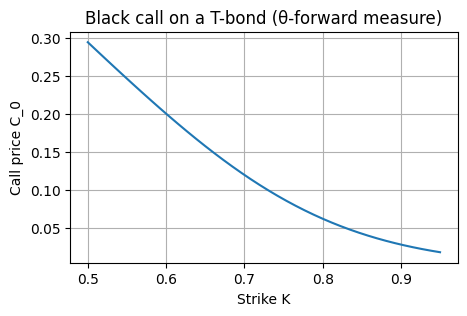

In [ ]:
Ks = np.linspace(0.5, 0.95, 40)
prices = [black_bond_call_price(P_t_theta, F_t, K_, sigma, tau) for K_ in Ks]

plt.figure(figsize=(5,3))
plt.plot(Ks, prices)
plt.xlabel("Strike K")
plt.ylabel("Call price C_0")
plt.title("Black call on a T-bond (θ-forward measure)")
plt.grid(True)
plt.show()

The Black call price for the chosen parameters is $C_0 \approx 0.088$, consistent with a moderately in-the-money forward bond: the forward $F_t = 0.8$ sits above the strike $K = 0.75$.

The strike sweep confirms the logic: call values are highest for low strikes and decay smoothly as $K$ increases, reflecting the log-normal $\theta$-forward dynamics and the discounting by $P(t,\theta)$. The shape is monotone, convex, and exactly what Black's formula predicts for bond options.
